# Assignment 3 - Numpy array Pt. 1


## Authors
V. Aquiviva and B.W. Holwerda

## Learning Goals
* Getting started on Python programming.
* Syntax of python and Jupyter Notebooks.

## Keywords
python, syntax, jupyter notebook, 

## Companion Content


## Summary

As usual, we are very grateful to J.R. Johansson at 

http://github.com/jrjohansson/scientific-python-lectures.

This work is licensed under a CC-BY license.
We also use material from

http://www.scipy-lectures.org/intro/numpy/operations.html

<hr>

## Student Name and ID: Christopher Stephens and 5439371



## Date:9/8/2023

<hr>

In [2]:
# what is this line all about?!? Answer in lecture 4
%matplotlib inline
import matplotlib.pyplot as plt

## Introduction

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

To use `numpy` you need to import the module, using for example:

In [3]:
import numpy as np

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*. 



## Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [4]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])

v

array([1, 2, 3, 4])

In [5]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4],[5,6]])

M

N = np.array([[[1], [2]], [[3], [4]],[[5],[6]]])

N

array([[[1],
        [2]],

       [[3],
        [4]],

       [[5],
        [6]]])

In [6]:
v.shape

(4,)

In [7]:
print(M.shape)
print(N.shape)
# print(M)
# print(N)

(3, 2)
(3, 2, 1)


The number of elements in the array is available through the `ndarray.size` property:

In [8]:
M.size

6

Equivalently, we could use the function `numpy.shape` and `numpy.size`

In [9]:
np.shape(M)

(3, 2)

In [10]:
np.size(M)

6

So far the `numpy.ndarray` looks awefully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when the array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [11]:
M.dtype

dtype('int64')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [12]:
M[0,0] = 4

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument: 

In [13]:
M = np.array([[1, 2], [3, 4]], dtype=complex)

M

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Common data types that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

### Using array-generating functions

For larger arrays it is not practical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generate arrays of different forms. Some of the more common are:

#### arange (already known)

In [14]:
# create a range

x = np.arange(0, 10, 0.5) # arguments: start, stop, step

x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

#### linspace 

In [15]:
# using linspace, both end points ARE included. 
#Arguments are start, stop and # of values (not STEP!)
np.linspace(0, 10, 25) 

array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])

#### Random data

Random data have lots of uses in statistics and physics, but even at a more fundamental level, when you want to 
quickly generate an array to play with. Basic operations with random numbers are contained in the
module "random"; note that since computers cannot generate truly random numbers, they are effectively
pseudorandom numbers that can be re-generated using a seed.

In [16]:
from numpy import random
random.rand(2) #This function generates 2 uniform random numbers in [0,1]

array([0.64537642, 0.23989097])

In [17]:
random.seed(42)
print(random.rand(2))
random.seed(42)
print(random.rand(4))
random.seed(42)
print(random.rand(8))

[0.37454012 0.95071431]
[0.37454012 0.95071431 0.73199394 0.59865848]
[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615]


In [18]:
# uniform random numbers in [0,1]
random.rand(5,5)

array([[0.60111501, 0.70807258, 0.02058449, 0.96990985, 0.83244264],
       [0.21233911, 0.18182497, 0.18340451, 0.30424224, 0.52475643],
       [0.43194502, 0.29122914, 0.61185289, 0.13949386, 0.29214465],
       [0.36636184, 0.45606998, 0.78517596, 0.19967378, 0.51423444],
       [0.59241457, 0.04645041, 0.60754485, 0.17052412, 0.06505159]])

In [19]:
# standard normal distributed random numbers
random.randn(5,5)

array([[-0.60025385,  0.94743982,  0.291034  , -0.63555974, -1.02155219],
       [-0.16175539, -0.5336488 , -0.00552786, -0.22945045,  0.38934891],
       [-1.26511911,  1.09199226,  2.77831304,  1.19363972,  0.21863832],
       [ 0.88176104, -1.00908534, -1.58329421,  0.77370042, -0.53814166],
       [-1.3466781 , -0.88059127, -1.1305523 ,  0.13442888,  0.58212279]])

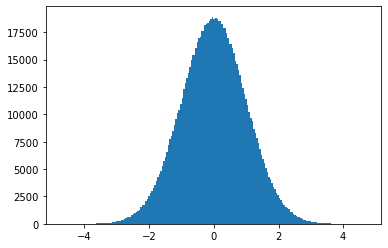

In [20]:
plt.hist(random.randn(1000000), bins=200);

#### Generating arrays with zeros and ones

In [21]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [22]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [23]:
np.empty((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### Accessing elements of numpy arrays

In [24]:
x = np.random.randint(0,high=10,size=(3,3))
x

array([[5, 6, 1],
       [7, 7, 1],
       [4, 0, 8]])

In [25]:
#elements are accessed using [row, column];

x[0,2]

1

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array) 

In [26]:
x[1]

array([7, 7, 1])

The same thing can be achieved with using `:` instead of an index: 

In [27]:
x[1,:] # second row 

array([7, 7, 1])

In [28]:
x[:,1] # second column 

array([6, 7, 0])

We can assign new values to elements in an array using indexing:

In [36]:
x[0,0] = 1

In [37]:
x

array([[1, 1, 3],
       [0, 3, 1],
       [3, 5, 6]])

In [38]:
# also works for rows and columns
x[1,:] = 0

In [39]:
x

array([[1, 1, 3],
       [0, 0, 0],
       [3, 5, 6]])

In [40]:
x[:,2] = -1

In [41]:
x

array([[ 1,  1, -1],
       [ 0,  0, -1],
       [ 3,  5, -1]])

In [42]:
# This sums all elements

# x.sum()
print(np.sum(x))

7


In [43]:
x.sum(axis=0)   # This sums all elements by column, which drives me insane

array([ 4,  6, -3])

In [44]:
x.sum(axis=1)   # This sums all elements by rows

array([ 1, -1,  7])

#### It's possible to perform operations on numpy arrays much faster than in pure Python and they are carried out element-wise.

In [45]:
import numpy as np 

a = np.arange(5)

print(a)

print(a + 1)

print(a**2)

[0 1 2 3 4]
[1 2 3 4 5]
[ 0  1  4  9 16]


In [47]:
b = np.random.rand(5)
b

array([0.72850326, 0.79747337, 0.38042946, 0.65092999, 0.3557006 ])

In [48]:
a*b

array([0.        , 0.79747337, 0.76085892, 1.95278996, 1.42280242])

In [51]:
a/b

array([ 0.        ,  1.25396037,  5.2572164 ,  4.60879059, 11.24541244])

### Other useful things 

In [52]:
#Reshaping

Z = np.arange(9).reshape(3,3)
print(Z)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [53]:
#min, max and their indexes

x = np.array([[1, 3, 2]])

print(x.min(), x.max())

print(x.argmin(),x.argmax())  # index of minimum, maximum (flattened if > 1D array)


1 3
0 1


In [54]:
# any and all operations:

print(np.any(x != 1))

print(np.all(x > 1))

True
False


In [ ]:
x

In [56]:
#Basic statistics

y = np.array([[1, 2, 3], [5, 6, 1]])

print(y)
print(y.mean())
print(y.mean(axis=0)) #by columns
print(y.mean(axis=1)) #by row

#same syntax for median, std, min, max etc

[[1 2 3]
 [5 6 1]]
1.9148542155126762
[2. 2. 1.]
[0.81649658 2.1602469 ]


# Exercises

1\. Create a one-dimensional numpy array that contains the numbers 4,5,6,7,8 without explicingly typing the numbers.

2\. Create a two-dimensional numpy array with shape (3,4) and fill it with zeros.

3\. Create a null vector of size 10 but the second and last value of which is 1.

4\. Create a random vector of size 20 with values between 0 and 1.

5\. Create a random vector of size 20 with values between 0 and 2. Find the mean value, 
    the minimum value and the index of the minimum value.
    
6\. Create random vector of size 10 and replace the maximum value by 0 

7\. Define a function that takes as input two arrays a and b and
    1. Checks if they are of equal length;
    2. Returns a funny message if they aren't
    3. Returns the element-wise difference if they are 
    
8\. Define a function that takes as input two arrays a and b and
    1. Checks if they are of equal length and throws an error if they are not;
    2. Checks if all elements in a are > 0;
    3. Checks if any elements in b are < 0;
    4. Returns the logical AND of 2. and 3.
    
9\. Define a function that checks if two arrays a and b have any element in common.

### Exercise 1\. 

Create a one-dimensional numpy array that contains the numbers 4,5,6,7,8 without explicitly typing the numbers.


In [1]:
# 1\. Create a one-dimensional numpy array that contains the numbers 4,5,6,7,8 without explicingly typing the numbers.
import numpy as np
v = np.arange(4,9, 1)
v

array([4, 5, 6, 7, 8])

### Exercise 2\. 

Create a two-dimensional numpy array with shape (3,4) and fill it with zeros.


In [3]:
# 2\. Create a two-dimensional numpy array with shape (3,4) and fill it with zeros.
np.zeros((3,4))


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### Exercise 3\. 

Create a null vector of size 10 but the second and last value of which is 1.

In [11]:
# 3\. Create a null vector of size 10 but the second and last value of which is 1.
nullvector = np.zeros(10)
nullvector[1] = 1
nullvector[-1] = 1
nullvector

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1.])

### Exercise 4\. 

Create a random vector of size 20 with values between 0 and 1.


In [5]:
# 4\. Create a random vector of size 20 with values between 0 and 1.

c = np.random.rand(20)
c

array([0.45789617, 0.78621839, 0.01021413, 0.07546153, 0.38570321,
       0.07961061, 0.63199864, 0.96109614, 0.72251087, 0.99375817,
       0.10246535, 0.00102779, 0.05275631, 0.61115577, 0.7124014 ,
       0.65356228, 0.7671792 , 0.65781121, 0.75245575, 0.9512994 ])

### Exercise 5\. 

Create a random vector of size 20 with values between 0 and 2. Find the mean value, 
    the minimum value and the index of the minimum value.
 

In [8]:
# 5\. Create a random vector of size 20 with values between 0 and 2. Find the mean value, 
v2 = 2.0*np.random.rand(20)
print(v2.mean())
print(v2.min())
print(v2.argmin())
v2

1.0845364682127134
0.009071502320908476
3


array([0.73317947, 0.85038346, 1.68547163, 0.0090715 , 1.72280143,
       0.78362698, 0.0911949 , 1.30677417, 1.53664365, 0.87427608,
       1.9555594 , 1.56413318, 1.04407925, 0.60709697, 1.4960078 ,
       0.66049988, 1.22959595, 0.35314734, 1.6731047 , 1.51408162])

### Exercise 6\. 

Create random vector of size 10 and replace the maximum value by 0 


In [16]:
# 6\. Create random vector of size 10 and replace the maximum value by 0 
randomvec = np.random.rand(10)
randomvec[np.argmax(randomvec)] = 0
randomvec

array([0.        , 0.42469092, 0.54610139, 0.62636765, 0.15596896,
       0.11170022, 0.67373499, 0.60957478, 0.37667431, 0.22074891])

### Exercise 7\. 
Define a function that takes as input two arrays a and b and
 *    1. Checks if they are of equal length;
 *    2. Returns a funny message if they aren't
 *    3. Returns the element-wise difference if they are 


In [14]:
# 7\. Define a function that takes as input two arrays a and b and
#     1. Checks if they are of equal length;
#     2. Returns a funny message if they aren't
#     3. Returns the element-wise difference if they are 
def arraychecker(a, b):
    if(a.size == b.size):
        return abs(np.sum(a) - np.sum(b))
    else:
        return "It's illegal to lick doorknobs on other planets"
a = np.array([1,2,3,4])
b = np.array([2,3,4,6,7])
arraychecker(a,b)

"It's illegal to lick doorknobs on other planets"

### Exercise 8\. 

Define a function that takes as input two arrays a and b and
 *    1. Checks if they are of equal length and throws an error if they are not;
 *    2. Checks if all elements in a are > 0;
 *    3. Checks if any elements in b are < 0;
 *    4. Returns the logical AND of 2. and 3.



In [5]:
# 8\. Define a function that takes as input two arrays a and b and
#     1. Checks if they are of equal length and throws an error if they are not;
#     2. Checks if all elements in a are > 0;
#     3. Checks if any elements in b are < 0;
#     4. Returns the logical AND of 2. and 3.
import numpy as np

def arraychecker2(a,b):
    if(a.size == b.size):
        if(np.all(a>0) and np.any(b<0)):
           t = np.all(a>0) and np.any(b<0)
           return t
        else:
           return False
    else:
           print("error")
a = np.array([3,-4,5,9,10])
b = np.array([2])
arraychecker2(a, a)

False

### Exercise 9\. 

Define a function that checks if two arrays a and b have any element in common.


In [8]:
# 9\. Define a function that checks if two arrays a and b have any element in common.
def anycommonelements(a,b):
    for aelements in a:
        for belements in b:
            if(aelements == belements):
                return True
            
    return False
a = np.array([3,-4,5,9,10,2])
b = np.array([2])
anycommonelements(a, b)

True

<hr>